# Customer Purchase Behavior Analysis using Descriptive Statistics

##### **Name**            - JITESH SACHDEV

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [65]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# load the data
df = pd.read_csv('/content/Superstore Marketing Data  - applied statstics dataset.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [14]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
#Check missing value
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [18]:
# Handling missing values: let's fill missing Income with median (since it's numerical)
df['Income'] = df['Income'].fillna(df['Income'].median())


In [20]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [33]:
# Create new column 'Age' from 'Year_Birth'
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']

In [38]:
#Analyze Customer Demographics

# Descriptive statistics for Age
df.Age.describe()

,Age
count,2240.000000
mean,56.194196
std,11.984069
min,29.000000
25%,48.000000
50%,55.000000
75%,66.000000
max,132.000000


In [30]:
# Descriptive statistics for Education
df.Education.value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [32]:
# Descriptive statistics for Marital Status
df.Marital_Status.value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2


In [39]:
# Visualizations
plt.figure(figsize=(16, 4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

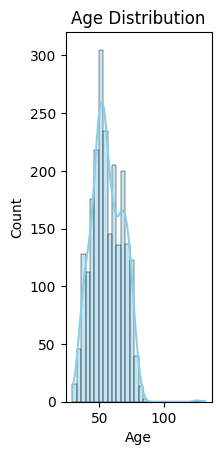

In [40]:
# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Education Levels')

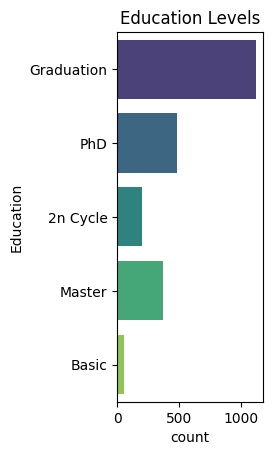

In [42]:
# Education count plot
plt.subplot(1, 3, 2)
sns.countplot(y='Education', hue='Education', data=df, palette='viridis', legend=False)
plt.title('Education Levels')

Text(0.5, 1.0, 'Marital Status')

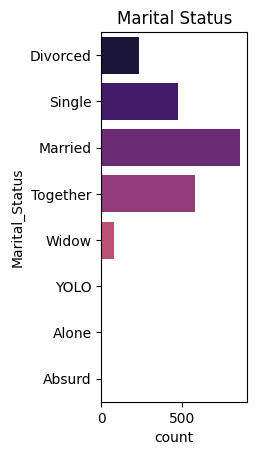

In [46]:
# Marital status count plot
plt.subplot(1, 3, 3)
sns.countplot(y='Marital_Status', hue='Marital_Status', data=df, palette='magma', legend=False)
plt.title('Marital Status')




**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [49]:
# Select numerical columns for descriptive statistics
num_cols = ['Income', 'Age', 'Kidhome', 'Teenhome', 'MntFishProducts', 'MntMeatProducts',
            'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds',
            'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']


In [52]:
# Descriptive statistics summary
df[num_cols].describe()


,Income,Age,Kidhome,Teenhome,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,56.194196,0.444196,0.506250,37.525446,166.950000,26.302232,27.062946,303.935714,44.021875,2.325000,2.662054,5.790179,4.084821,5.316518,49.109375
std,25037.955891,11.984069,0.538398,0.544538,54.628979,225.715373,39.773434,41.280498,336.597393,52.167439,1.932238,2.923101,3.250958,2.778714,2.426645,28.962453
min,1730.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,48.000000,0.000000,0.000000,3.000000,16.000000,1.000000,1.000000,23.750000,9.000000,1.000000,0.000000,3.000000,2.000000,3.000000,24.000000
50%,51381.500000,55.000000,0.000000,0.000000,12.000000,67.000000,8.000000,8.000000,173.500000,24.000000,2.000000,2.000000,5.000000,4.000000,6.000000,49.000000
75%,68289.750000,66.000000,1.000000,1.000000,50.000000,232.000000,33.000000,33.000000,504.250000,56.000000,3.000000,4.000000,8.000000,6.000000,7.000000,74.000000
max,666666.000000,132.000000,2.000000,2.000000,259.000000,1725.000000,199.000000,263.000000,1493.000000,362.000000,15.000000,28.000000,13.000000,27.000000,20.000000,99.000000


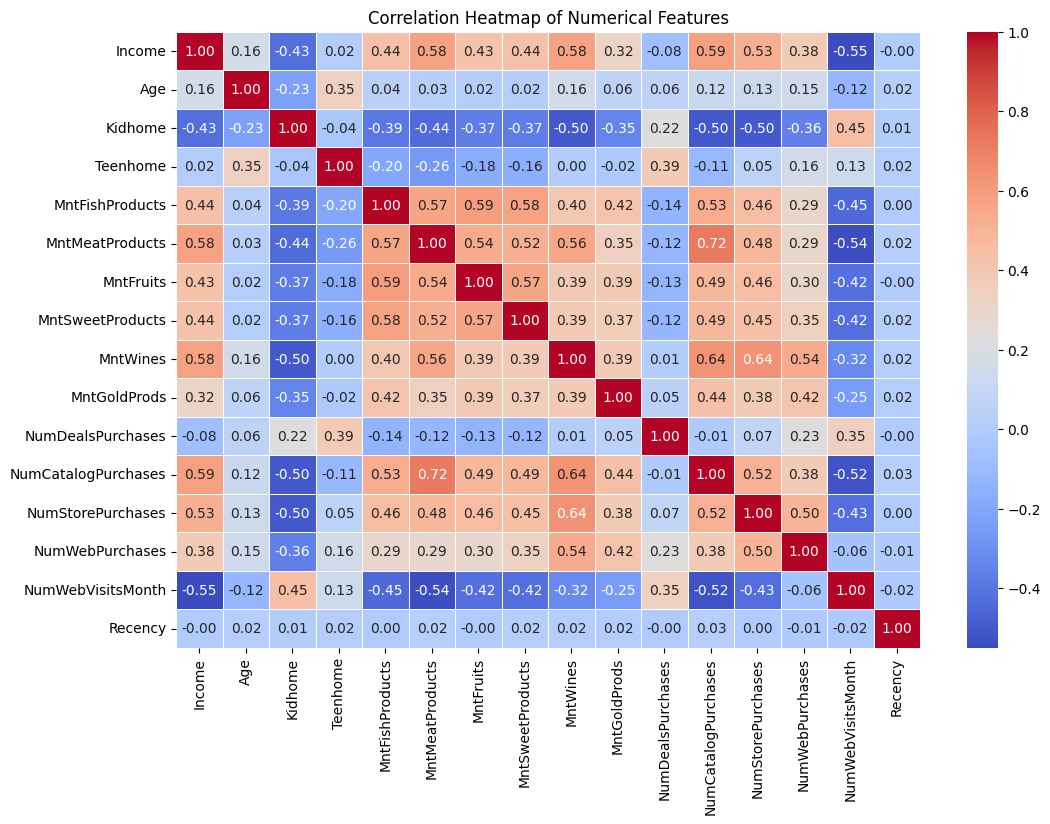

In [53]:
# Correlation matrix
corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


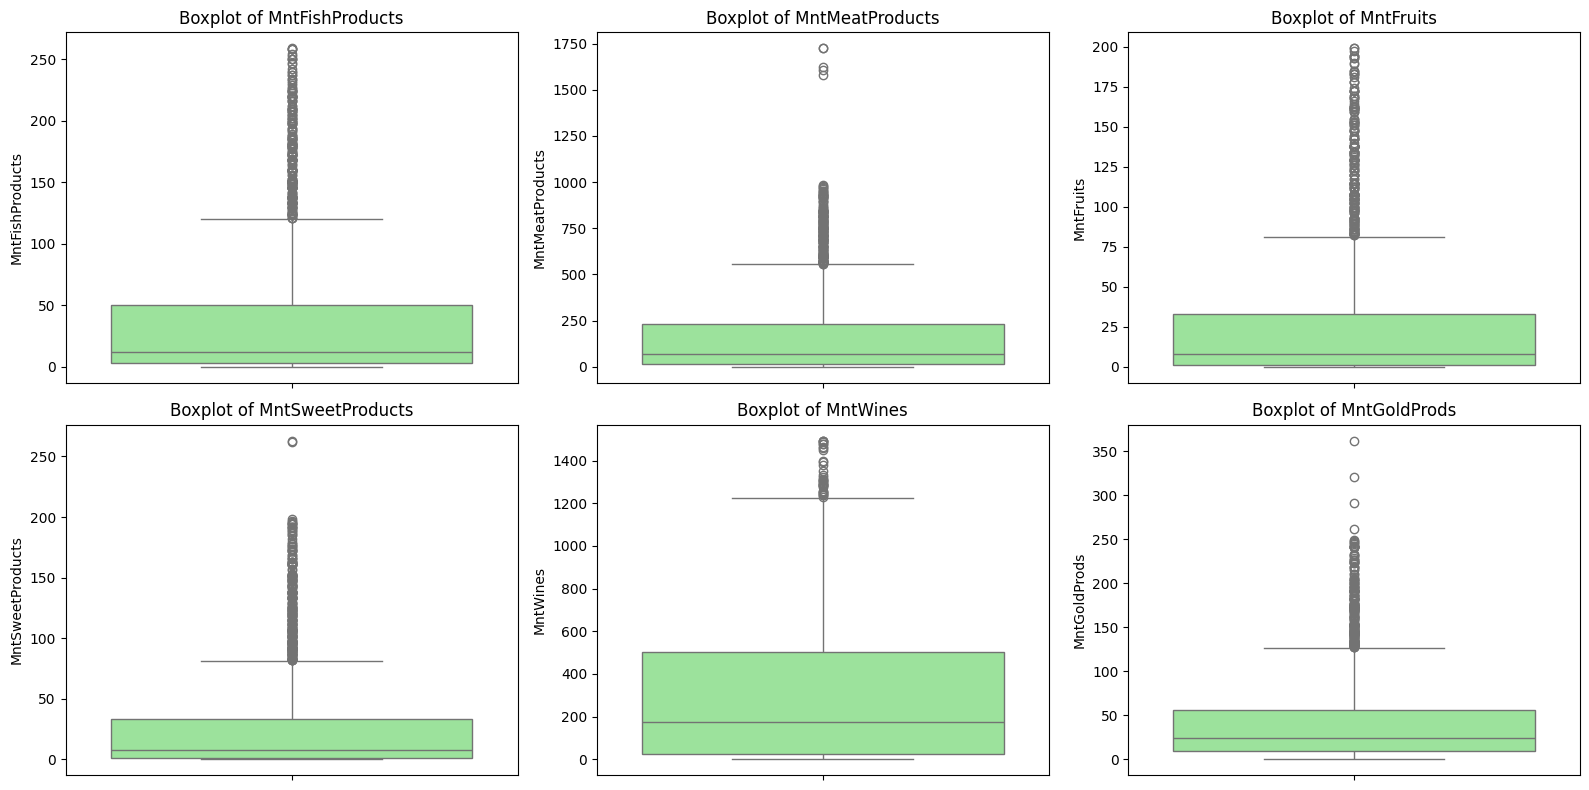

In [54]:
# Boxplots to understand spending behavior
spending_cols = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

plt.figure(figsize=(16, 8))
for i, col in enumerate(spending_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



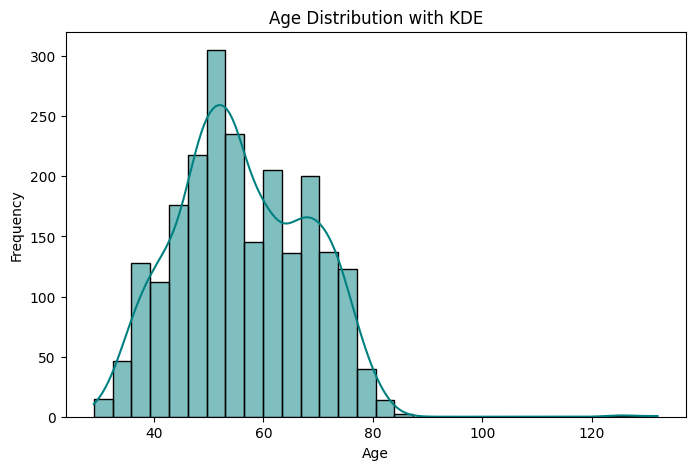

In [55]:
# 1. Age Distribution Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color='teal', bins=30)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

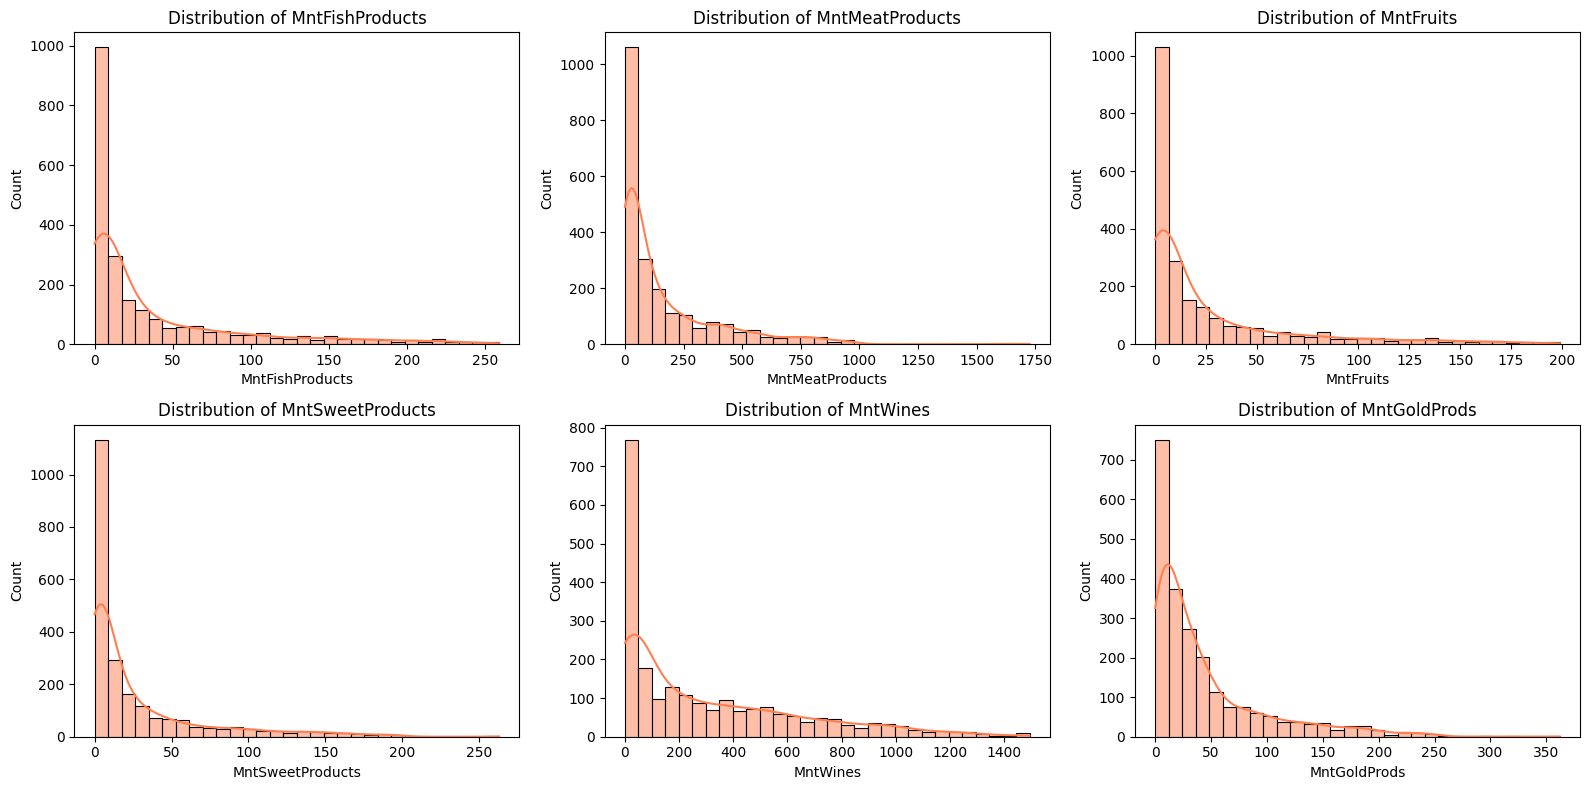

In [56]:
# 2. Spending Behavior Distribution
plt.figure(figsize=(16, 8))
for i, col in enumerate(spending_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='coral', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

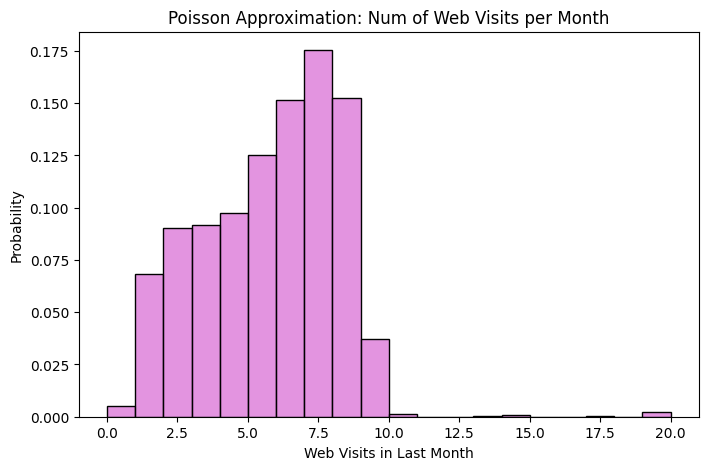

In [57]:
# 3. Poisson Distribution Example: Web Visits per Month
plt.figure(figsize=(8, 5))
sns.histplot(df['NumWebVisitsMonth'], bins=range(0, df['NumWebVisitsMonth'].max()+1), kde=False, color='orchid', stat='probability')
plt.title('Poisson Approximation: Num of Web Visits per Month')
plt.xlabel('Web Visits in Last Month')
plt.ylabel('Probability')
plt.show()

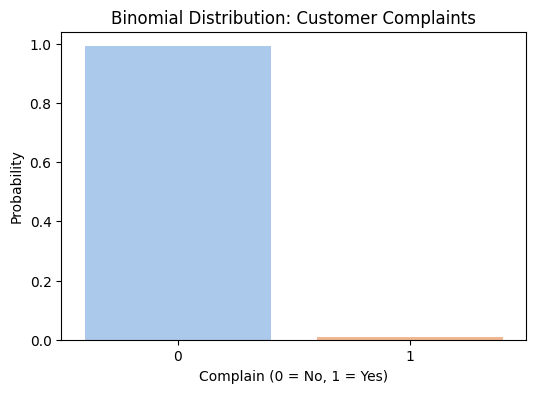

In [59]:
# 4. Binomial Distribution Example: Customer Complaints (Yes/No)
complain_df = complain_counts.reset_index()
complain_df.columns = ['Complain', 'Probability']

plt.figure(figsize=(6, 4))
sns.barplot(x='Complain', y='Probability', hue='Complain', data=complain_df, palette='pastel', legend=False)
plt.title('Binomial Distribution: Customer Complaints')
plt.xlabel('Complain (0 = No, 1 = Yes)')
plt.ylabel('Probability')
plt.xticks([0, 1])
plt.show()


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

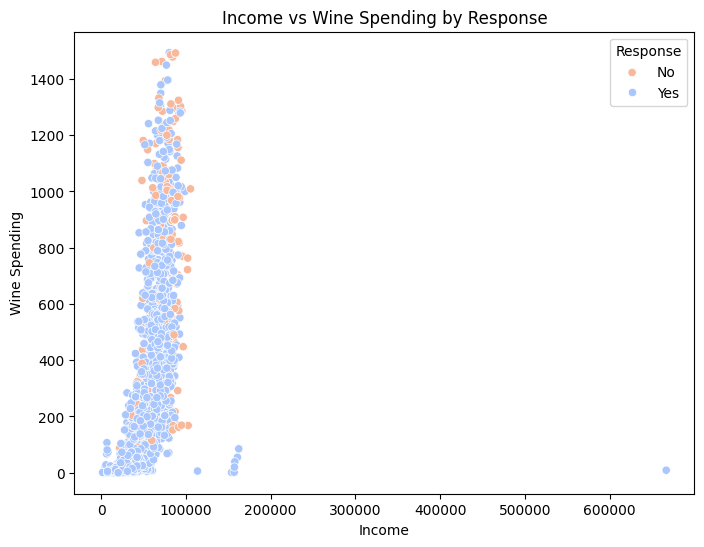

In [66]:
# 1. Insight: Income vs Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntWines', data=df, hue='Response', palette='coolwarm')
plt.title('Income vs Wine Spending by Response')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

# **Insight:**
Higher income customers tend to spend more on wines

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

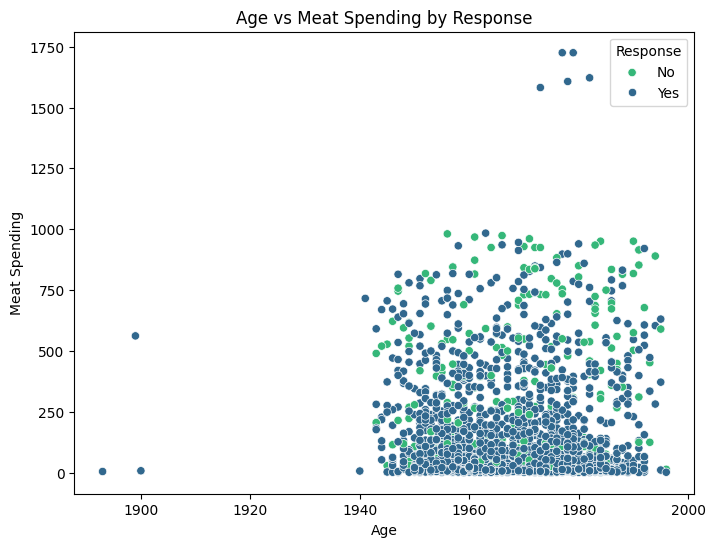

In [67]:
# 2. Insight: Age vs Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year_Birth', y='MntMeatProducts', data=df, hue='Response', palette='viridis')
plt.title('Age vs Meat Spending by Response')
plt.xlabel('Age')
plt.ylabel('Meat Spending')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

# **Insight:**
Middle-aged customers tend to spend more on meat products.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

### Conclusion:
- The customer base is diverse, with clear segments based on income, age, and spending habits.
- Premium customers are highly valuable and can be targeted with exclusive offers.
- There is a significant group of moderate spenders who are regular purchasers across multiple channels.
- Younger families form a promising segment for future growth.

1. **Targeted Marketing:**
   - Use personalized campaigns for premium customers focusing on luxury products (wines, gold).
   - Engage young families with bundle offers and family-friendly promotions.

2. **Retention Strategies:**
   - Offer loyalty programs to regular customers to increase their spending frequency.
   - Monitor and re-engage price-sensitive segments with discounts and seasonal offers.

3. **Product Promotions:**
   - Promote high-performing categories like wines and meats during festive seasons.
   - Explore upselling opportunities in underutilized categories such as sweet products and gold items.

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍